# Diagonalization

In linear algebra, diagonalization is a process that can be represented by the equation:

$$
D = P^T A P
$$

Where:
- $D$ is a diagonal matrix, and each of its entries corresponds to an eigenvalue of matrix $A$.
- $P$ is an orthogonal matrix, which is composed of the eigenvectors of matrix $A$. The nature of $P$ depends on the orientation of the eigenvectors and can be either a simple rotation matrix or a mirrored (reflection) rotation matrix.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = np.array([[2, 1], 
              [1, 2]])
eigenvalues, P = np.linalg.eig(A)
eigenvalues

array([3., 1.])

In [2]:
P # simple rotation matrix

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [3]:
P[:, 0] # eigenvector p1 

array([0.70710678, 0.70710678])

In [4]:
P[:, 1] # eigenvector p2

array([-0.70710678,  0.70710678])

In [5]:
D = P.T @ A @ P
D

array([[3., 0.],
       [0., 1.]])

In [6]:
points = np.array([[-0.25,  0.  ],
                   [ 0.25,  0.  ],
                   [ 0.25,  0.5 ],
                   [ 0.5 ,  0.5 ],
                   [ 0.  ,  1.  ],
                   [-0.5 ,  0.5 ],
                   [ -0.25,  0.5 ],
                   [-0.25,  0.  ],
                   [ 0.  ,  0.  ]])

V= np.array(points).T
V # project these vectors

array([[-0.25,  0.25,  0.25,  0.5 ,  0.  , -0.5 , -0.25, -0.25,  0.  ],
       [ 0.  ,  0.  ,  0.5 ,  0.5 ,  1.  ,  0.5 ,  0.5 ,  0.  ,  0.  ]])

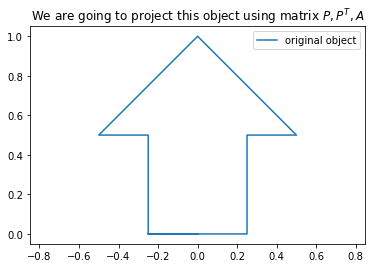

In [7]:
# project this object
x = V[0]
y = V[1]
plt.plot(x, y, label='original object')
plt.title('We are going to project this object using matrix $P, P^T, A$')
plt.axis('equal')
plt.legend()

In [8]:
def plot(x, y, PV, APV, PtAPV, P, title):
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.plot(x, y, label='original object')
    ax.plot(PV[0, :], PV[1, :], label='Pv')
    ax.plot(APV[0, :], APV[1, :], label='APv')
    ax.plot(PtAPV[0, :], PtAPV[1, :], label='$P^TAPv$')
    ax.quiver(0, 0, P[0,0], P[0, 1], label='eigenvector $p_1$ of $A$', color='k', alpha=0.5)
    ax.quiver(0, 0, P[1,0], P[1, 1], label='eigenvector $p_2$ of $A$', color='gray', alpha=0.5)
    ax.axis('equal')
    ax.set_title(title)
    ax.legend()

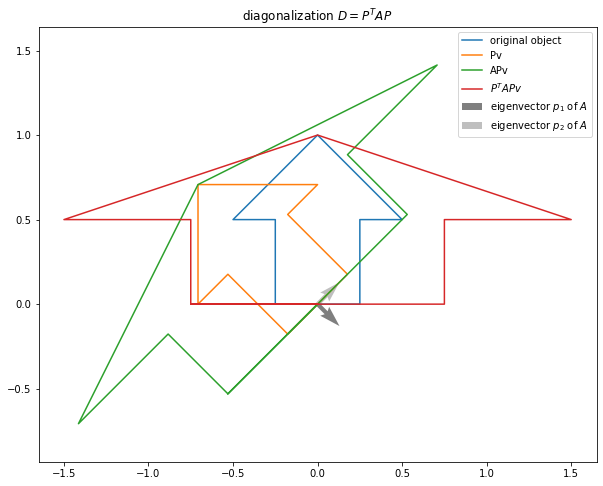

In [9]:
PV = P @ V
APV = A @ P @ V
PtAPV = P.T @ APV
title = 'diagonalization $D=P^T AP$'
plot(x, y, PV, APV, PtAPV, P, title)

# what if P is differenct?


In [10]:
def rotation_matrix(angle):
    '''
    angle: [radian]
    '''
    # Generate the 2D rotation matrix
    rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)],
                                [np.sin(angle), np.cos(angle)]])
    return rotation_matrix



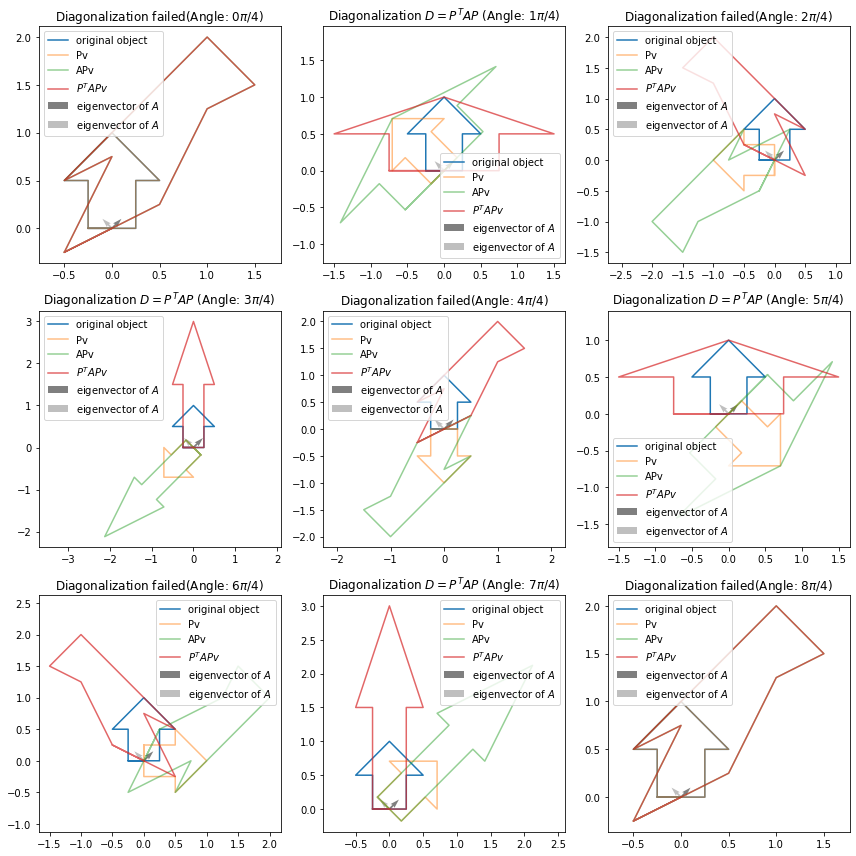

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of subplots (3x3)
fig, axes = plt.subplots(3, 3, figsize=(12, 12))

_, eigenvectors = np.linalg.eig(A)
u1 = eigenvectors[:, 0]
u2 = eigenvectors[:, 1]

# Loop through different angles
for i, ax in enumerate(axes.flat):
    angle = i * np.pi / 4  
    P = rotation_matrix(angle)
    PV = P @ V
    APV = A @ P @ V
    PtAPV = P.T @ APV
    if i % 4 == 1 or i % 4 == 3:
        title = f'Diagonalization $D=P^TAP$ (Angle: {i}$\pi$/4)'
    else:
        title = f'Diagonalization failed(Angle: {i}$\pi$/4)'
    
    ax.plot(x, y, label='original object')
    ax.plot(PV[0, :], PV[1, :], label='Pv', alpha=0.5)
    ax.plot(APV[0, :], APV[1, :], label='APv', alpha=0.5)
    ax.plot(PtAPV[0, :], PtAPV[1, :], label='$P^TAPv$', alpha=0.7)
    ax.quiver(0, 0, u1[0], u1[1], label='eigenvector of $A$', color='k', alpha=0.5)
    ax.quiver(0, 0, u2[0], u2[1], label='eigenvector of $A$', color='gray', alpha=0.5)
    ax.axis('equal')
    ax.set_title(title)
    ax.legend()

# Adjust layout for better spacing
plt.tight_layout()

# Show the subplots
plt.show()


I'll explain the concepts step by step:

Let $A$ be a real-valued symmetric matrix, and let $p_i$ represent its eigenvectors.

First, the rotation matrix $P$ rotates a vector $v$ counterclockwise around the origin by an angle of $\pi/4$ radians.

When we perform the operation $A(Pv)$, it signifies stretching or scaling vector $Pv$ along the direction of the eigenvector $p_i$. (For more details, see [Wikipedia](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors))

Next, the transpose of $P$, denoted as $P^T$, rotates the vector $APv$ clockwise by an angle of $\pi/4$ radians around the origin.

Finally, the operation $P^TAPv$ brings the vector back to its original orientation.


In [12]:
P = rotation_matrix(np.pi/4)
P.T @ A @ P

array([[3., 0.],
       [0., 1.]])

In [13]:
P = rotation_matrix(3*np.pi/4)
P.T @ A @ P

array([[ 1.00000000e+00, -2.22044605e-16],
       [ 0.00000000e+00,  3.00000000e+00]])

In [14]:
P = rotation_matrix(5*np.pi/4)
P.T @ A @ P

array([[3.00000000e+00, 4.44089210e-16],
       [3.33066907e-16, 1.00000000e+00]])

In [15]:
P = rotation_matrix(7*np.pi/4)
P.T @ A @ P

array([[ 1.0000000e+00, -4.4408921e-16],
       [-4.4408921e-16,  3.0000000e+00]])